In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

from rule.rule_utils import calculate_new_rules
from utils.plot_config import *
mpl.rc('lines', linewidth=plot_line_width)

In [2]:
# Before running this notebook make sure to execute the following commands, to create the necessary datasets:
# ! python data/coveo_preproc.py -p data/data_sources/coveo_ecommerce
# ! python data/retailrocket_preproc.py -p data/data_sources/retailrocket_ecommerce
# ! python data/rees46_preproc.py -p data/data_sources/ress46_ecommerce

In [3]:
experiments = {
    "coveo": {
        "full_path": "data/data_sources/coveo_ecommerce/coveo_processed_view_full.tsv",
        "time_units": "ms"
    },
    "retailrocket": {
        "full_path": "data/data_sources/retailrocket_ecommerce/retailrocket_processed_view_full.tsv",
        "time_units": "ms"
    },
    "rees46": {
        "full_path": "data/data_sources/rees46_ecommerce/rees46_processed_view_full.tsv",
        "time_units": "s"
    },
}

In [4]:
for dataset_name, dataset_params in experiments.items():
    calculate_new_rules(**dataset_params)

Calculating daily new rules for: data/data_sources/coveo_ecommerce/coveo_processed_view_full.tsv
	SKIPPING, file exists: data/results/rule_new/coveo_new_rules.tsv
Calculating daily new rules for: data/data_sources/retailrocket_ecommerce/retailrocket_processed_view_full.tsv
	SKIPPING, file exists: data/results/rule_new/retailrocket_new_rules.tsv
Calculating daily new rules for: data/data_sources/rees46_ecommerce/rees46_processed_view_full.tsv
	SKIPPING, file exists: data/results/rule_new/rees46_new_rules.tsv


In [5]:
def format_plot(ax):
    ax.legend(loc=1, prop={'size': fontsize*0.8})
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(plot_axis_line_width)
    ax.tick_params(width=plot_axis_line_width)
    ax.tick_params(axis='both', which='major', labelsize=fontsize*0.8)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize*0.8)
    ax.xaxis.grid()

### Daily new rules for Rees46, Coveo, Retailrocket
- The ratio of $i \rightarrow j$ item transitions observed first on day *N* divided by the number of unique sequences on the same day.
- After some initial decline the value stabilizes on a high level for each dataset, indicating that the user behaviour is constantly changing (concept-drift).
- A time overlap between train/test splits lessen the need of modeling the concept drift, and may provide an easier, unrealistic problem for which less generalization is needed.

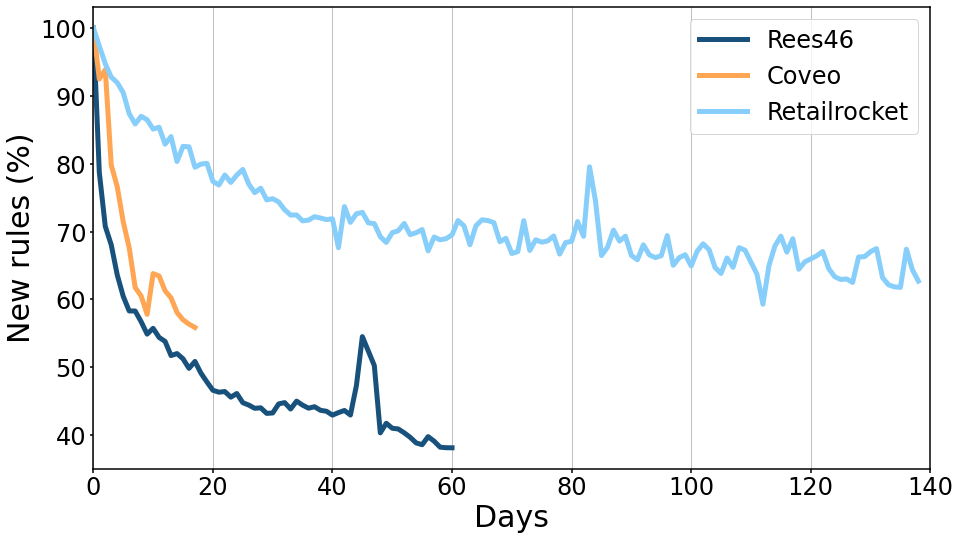

In [6]:
dataset_names = ["Rees46", "Coveo", "Retailrocket"]
ds_colors = {"Rees46": colors["color_0"], "Coveo": colors["color_1"], "Retailrocket": colors["color_2"]}
fig, ax = plt.subplots(figsize=(15,8.5))
for ds_name in dataset_names:
    data = pd.read_csv(os.path.join("data", "results", "rule_new", f"{ds_name.lower()}_new_rules.tsv"), sep='\t', header=None).values.flatten()
    x = np.arange(len(data))
    y = data*100
    ax.plot(x, y, label=f"{ds_name}", c=ds_colors[ds_name])

format_plot(ax=ax)
ax.set_xlabel("Days", fontsize=fontsize)
ax.set_ylabel("New rules (%)", fontsize=fontsize)
ax.set_xlim([0,140])
plt.show()